In [1]:
import pandas as pd
import numpy as np
import time
import random
from sklearn.model_selection import train_test_split
import pickle

In [2]:
data = pd.read_csv('Copy of Depression and Happiness Factor Analysis.csv')
data = data.drop(['Timestamp'], axis=1)
data.head()

,Which year are you in?,How are you feeling right now?,"On a scale of 1-100, how would you express this feeling?",Gender,Age,Your location ?,Relationship status,Are you happy with your financial state?,How much have you succeeded to cope up with the environment of your educational institution?,Understanding with your family members?,Are you feeling pressure in your study or work right now?,Are you satisfied with your academic result?,Are you happy with your living place?,Who supports you when you are not succeeding in your academic life?,Have you used any social media within the last 6 hours?,Do you have inferiority complex?,Are you satisfied with your meal today?,Are you feeling sick/health issues today?,"Have you done any recreational activity (sports, gaming, hobby etc.) today?",How long did you sleep last night?(in hours)
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
3,4th year,Normal,45,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
4,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,Yes,Family,Yes,No,Yes,No,No,7


In [3]:
data.columns = ['year', 'feeling', 'feeling_scale', 'gender', 'age', 'location',
              'relation', 'fin_state', 'cope', 'fam_understanding', 'pressure', 'result', 'living_place',
              'support', 'social_media', 'inferiority', 'meal', 'sick', 'hobby', 'sleep']
data.head()

,year,feeling,feeling_scale,gender,age,location,relation,fin_state,cope,fam_understanding,pressure,result,living_place,support,social_media,inferiority,meal,sick,hobby,sleep
0,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
1,4th year,Normal,40,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
2,4th year,Bad,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,No,Family,Yes,No,Yes,No,No,7
3,4th year,Normal,45,Male,23,Home,Single,Yes,4,Normal,No,Yes,No,Family,Yes,No,Yes,No,No,7
4,4th year,Normal,50,Male,23,Home,Single,Yes,4,Normal,Yes,Yes,Yes,Family,Yes,No,Yes,No,No,7


In [4]:
target_dict = {'Very bad': 0, 'Bad': 1, 'Normal': 2, 'Good': 3, 'Very good': 4}
data.feeling = data['feeling'].map(target_dict)

In [5]:
data.feeling

0      2
1      2
2      1
3      2
4      2
      ..
699    2
700    4
701    4
702    4
703    3
Name: feeling, Length: 704, dtype: int64

In [6]:
feature_cols = ['year', 'feeling_scale','location', 'fin_state', 'cope', 'pressure', 'result', 
                'living_place', 'support', 'social_media', 'inferiority', 'meal', 
                'sick', 'hobby', 'sleep','fam_understanding', 'age']

X = data[feature_cols] # Features
y = data.feeling # Target variable

print(f"No. of features: {len(X.columns)}")

No. of features: 17


In [7]:
# one hot encoding 
X = pd.get_dummies(X, columns=['year', 'location', 'fin_state', 'pressure', 'result', 
                               'living_place', 'support', 'social_media', 'inferiority', 
                               'meal', 'sick', 'hobby', 'fam_understanding'])

print(f"No. of columns after one hot encoding: {len(X.columns)} ")
X.head()

No. of columns after one hot encoding: 33 


,feeling_scale,cope,sleep,age,year_4th year,location_Department,location_Hall-Mess,location_Home,location_Playground,fin_state_No,...,meal_Neutral,meal_No,meal_Yes,sick_No,sick_Yes,hobby_No,hobby_Yes,fam_understanding_Bad,fam_understanding_Good,fam_understanding_Normal
0,50,4,7,23,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
1,40,4,7,23,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
2,50,4,7,23,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
3,45,4,7,23,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1
4,50,4,7,23,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,1


In [8]:
## Train test split
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

## Build Model

In [9]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

/home/simanto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/simanto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/simanto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/simanto/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:5

In [10]:
input_shape = (X_train.shape[1], )
lr = 0.01
drop_rate = 0.2

In [11]:
model = keras.Sequential()
model.add(Dense(units=10, activation='tanh',input_shape=input_shape ))
model.add(Dropout(rate=drop_rate))
model.add(Dense(units=15, activation='tanh'))
model.add(Dropout(rate=drop_rate))
model.add(Dense(units=10, activation='tanh'))
model.add(Dropout(rate=drop_rate))
model.add(Dense(units=10, activation='tanh'))
model.add(Dropout(rate=drop_rate))
model.add(Dense(units=5, activation='softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                340       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                165       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [13]:
model_result = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Train on 563 samples, validate on 141 samples
Epoch 1/50
563/563 [==============================] - 0s 382us/sample - loss: 1.4030 - acc: 0.3410 - val_loss: 1.0524 - val_acc: 0.5887
Epoch 2/50
563/563 [==============================] - 0s 66us/sample - loss: 1.1087 - acc: 0.4263 - val_loss: 0.9438 - val_acc: 0.6170
Epoch 3/50
563/563 [==============================] - 0s 59us/sample - loss: 1.0465 - acc: 0.4760 - val_loss: 0.8182 - val_acc: 0.5745
Epoch 4/50
563/563 [==============================] - 0s 60us/sample - loss: 0.9674 - acc: 0.5115 - val_loss: 0.7850 - val_acc: 0.5957
Epoch 5/50
563/563 [==============================] - 0s 59us/sample - loss: 0.9381 - acc: 0.5382 - val_loss: 0.7754 - val_acc: 0.6028
Epoch 6/50
563/563 [==============================] - 0s 58us/sample - loss: 0.8617 - acc: 0.5471 - val_loss: 0.7395 - val_acc: 0.5461
Epoch 7/50
563/563 [==============================] - 0s 60us/sample - loss: 0.9110 - acc: 0.5524 - val_loss: 0.7566 - val_acc: 0.5248
Epoch 8/

In [14]:
accuracy = model.evaluate(X_test, y_test)
print("Loss: {}\nAccuracy: {}".format(accuracy[0], accuracy[1]))

141/141 [==============================] - 0s 48us/sample - loss: 0.3757 - acc: 0.8511
Loss: 0.3757303185919498
Accuracy: 0.8510638475418091


## Plotting

In [15]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

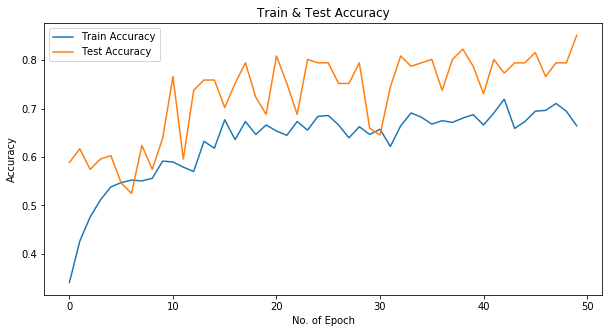

In [16]:
## Loss and accuracy
plt.figure(figsize=(10, 5))
plt.plot(model_result.history['acc'], marker=None)
plt.plot(model_result.history['val_acc'], marker=None)
plt.xlabel('No. of Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='upper left')
plt.title('Train & Test Accuracy')
plt.show()